## Generating output birbs

In [13]:
import os
import torch, torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from model import BirbSimpleAE

In [14]:
# Load model
birbgen = BirbSimpleAE(input_size=784)
birbgen.load_state_dict(torch.load('models/model1.pth'))
birbgen.eval()

BirbSimpleAE(
  (encoder_hidden_layer): Linear(in_features=784, out_features=128, bias=True)
  (encoder_output_layer): Linear(in_features=128, out_features=128, bias=True)
  (decoder_hidden_layer): Linear(in_features=128, out_features=128, bias=True)
  (decoder_output_layer): Linear(in_features=128, out_features=784, bias=True)
)

In [37]:
transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(240),
    transforms.ToTensor(),
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

data_dir = "/Users/nathanmandi/ML-stuff/BirdVAE/data/birds400"
train_data = torchvision.datasets.ImageFolder(os.path.join(data_dir, "train/"), transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1)
train_iter = iter(train_loader)

In [16]:
def show_birb(birb_tensor):
    birb_tensor = birb_tensor.squeeze().detach()
    image = birb_tensor.permute(1, 2, 0)
    plt.imshow(image)

In [17]:
def appraise_birb_encoding(inbirb):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    outbirb = birbgen(inbirb.view(-1, 784))
        
    inbirb = inbirb.squeeze().detach()
    inbirb = inbirb.permute(1, 2, 0)
    ax1.imshow(inbirb)
    
    outbirb = outbirb.squeeze().detach().view(3, 224, 224)
    outbirb = outbirb.permute(1, 2, 0)
    ax2.imshow(inbirb)
    

In [41]:
input_birb, label = next(train_iter)
reconstructed_birb = birbgen(input_birb.view(-1, 784))

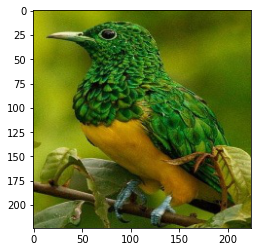

In [92]:
show_birb(input_birb)

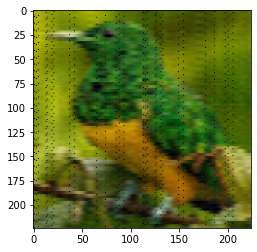

In [93]:
show_birb(reconstructed_birb.view(3, 224, 224))

In [36]:
reconstructed_birb.shape

torch.Size([192, 784])

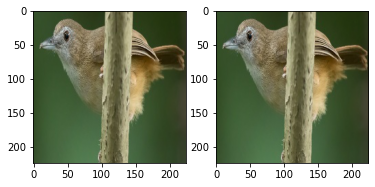

In [100]:
input_birb, label = next(train_iter)
appraise_birb_encoding(input_birb)

In [11]:
birbgen

BirbSimpleAE(
  (encoder_hidden_layer): Linear(in_features=784, out_features=128, bias=True)
  (encoder_output_layer): Linear(in_features=128, out_features=128, bias=True)
  (decoder_hidden_layer): Linear(in_features=128, out_features=128, bias=True)
  (decoder_output_layer): Linear(in_features=128, out_features=784, bias=True)
)

## Test data
It worked surprisingly well first try on training data. Perhaps it overfit? Surprised it could with the relatively small model and training time. Well, let's see the test birbs

In [39]:
test_data = torchvision.datasets.ImageFolder(os.path.join(data_dir, "test/"), transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)
test_iter = iter(test_loader)

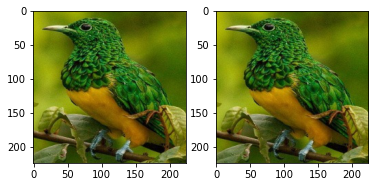

In [91]:
input_birb, label = next(test_iter)
appraise_birb_encoding(input_birb)

Okay everything is too perfect, there must be some mistake... But we are calling the model on the input, and the latent space is smaller than the input space. Regardless, let's try interpolating just for fun

## Interpolating between birbs

First trying a really basic thing where we interpolate between inputs, probably nonsense

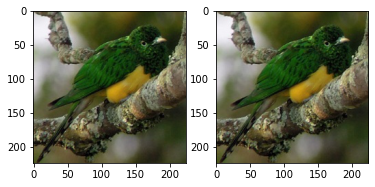

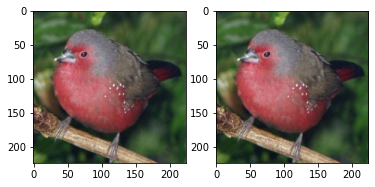

In [52]:
input_birb1, label = next(test_iter)
input_birb2, label = next(test_iter)

appraise_birb_encoding(input_birb1)
appraise_birb_encoding(input_birb2)

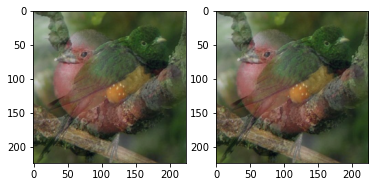

In [53]:
halfway = torch.lerp(input_birb1, input_birb2, 0.5)
appraise_birb_encoding(halfway)

## Interpolating in latent space as we should

First I gotta refactor the model to get out the latent space representation

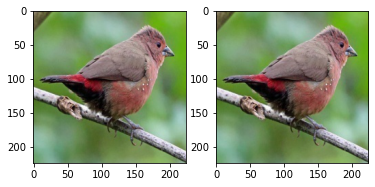

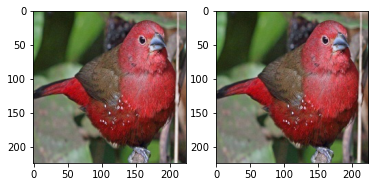

In [54]:
birb1, label = next(test_iter)
birb2, label = next(test_iter)

appraise_birb_encoding(birb1)
appraise_birb_encoding(birb2)

In [62]:
def interpolate(birb1, birb2):
    latent1 = birbgen.encode(birb1.view(-1, 784))
    latent2 = birbgen.encode(birb2.view(-1, 784))
    latent_halfway = torch.lerp(latent1, latent2, 0.5)

    halfbirb = birbgen.decode(latent_halfway)    
    
    
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    
    birb1 = birb1.squeeze().detach().permute(1, 2, 0)
    birb2 = birb2.squeeze().detach().permute(1, 2, 0)
    ax1.imshow(birb1)
    ax2.imshow(birb2)    
    
    halfbirb_image = halfbirb.detach().view(3, 224, 224).permute(1, 2, 0)
    ax3.imshow(halfbirb_image)
    

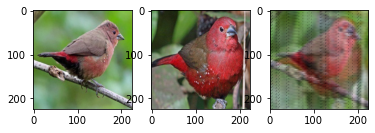

In [63]:
interpolate(birb1, birb2)

In [30]:
birb1.shape

torch.Size([1, 3, 240, 240])